In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_fake = pd.read_csv('/content/drive/My Drive/fake.csv')

In [4]:
df_true = pd.read_csv('/content/drive/My Drive/true.csv')

In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_fake['class'] = 0
df_true['class'] = 1

In [8]:
df_fake.shape

(23481, 5)

In [9]:
df_fake.describe()

,class
count,23481.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [10]:
df_true.shape

(21417, 5)

In [11]:
df_true.describe()

,class
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


# *pie* chart *representation*

([<matplotlib.patches.Wedge at 0x7fdfffd9a290>,
 [Text(-1.1968726922452788, -0.0865780489358482, 'Fake'),
  Text(1.196872705318187, 0.08657786821309862, 'True')],
 [Text(-0.6981757371430793, -0.05050386187924477, '52.3%'),
  Text(0.6981757447689423, 0.05050375645764086, '47.7%')])

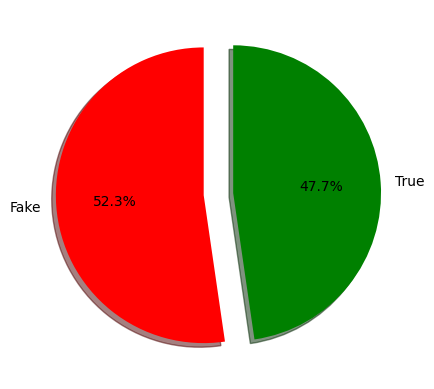

In [12]:
label_size = [df_fake.shape[0], df_true.shape[0]]
plt.pie(label_size,explode = [0.1,0.1],colors = ['red','green'],startangle=90,shadow=True,labels = ['Fake','True'],autopct ='%1.1f%%' )

# removing last 10 rows from both dataset for manual testing

In [13]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
  df_fake.drop([i],axis = 0,inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
  df_true.drop([i],axis = 0,inplace = True)

In [14]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [15]:
df_fake_manual_testing['outcome']= 0
df_true_manual_testing['outcome']= 1

/tmp/ipython-input-15-783086891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing['outcome']= 0
/tmp/ipython-input-15-783086891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing['outcome']= 1


In [16]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class,outcome
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0,0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0,0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0,0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0,0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0,0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0,0


In [17]:
df_true_manual_testing.head(10)

,title,text,subject,date,class,outcome
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1,1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1,1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1,1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1,1


In [18]:
df_merge = pd.concat([df_fake,df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


outcome
0    23471
1    21407
Name: text, dtype: int64


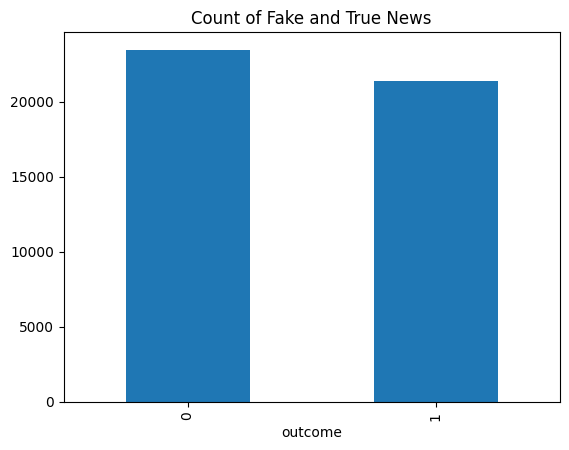

In [19]:
# Add the outcome column to df_fake and df_true before concatenating
df_fake['outcome'] = 0
df_true['outcome'] = 1

df_merge = pd.concat([df_fake,df_true], axis =0 )

print(df_merge.groupby(["outcome"])['text'].count())
df_merge.groupby(["outcome"])['text'].count().plot(kind = 'bar', title = 'Count of Fake and True News')
plt.show()

#white space tokenizer

In [20]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()

def counter(text,column_text, quantity):
  all_words = ' '.join([text for text in text[column_text]])
  token_phrase = token_space.tokenize(all_words)
  frequency = nltk.FreqDist(token_phrase)
  df_frequency = pd.DataFrame({"Word":list(frequency.keys()),"Frequency":list(frequency.values())})
  df_frequency = df_frequency.nlargest(columns = "Frequency",n = quantity)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = df_frequency,x = "Word",y = "Frequency", color = "blue")
  ax.set(ylabel = "Count")
  plt.xticks(rotation = 'vertical')
  plt.show()

#frequency of words in fake news

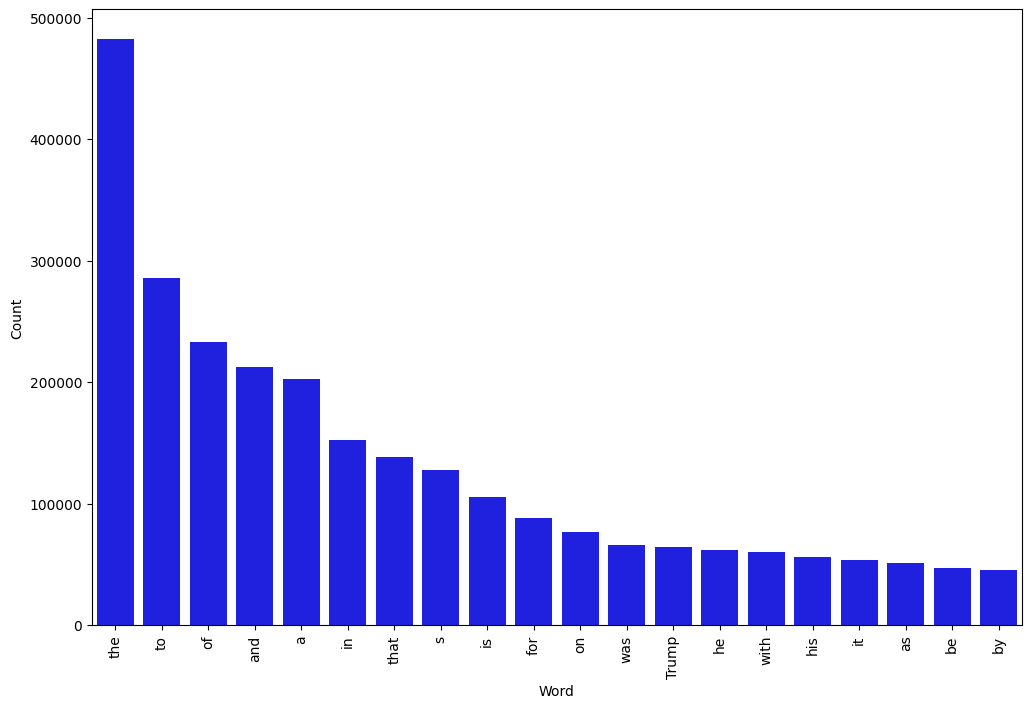

In [21]:
#most frequent words in fake news
counter(text=df_merge[df_merge["outcome"]==0], column_text="text", quantity=20)

In [22]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class', 'outcome'], dtype='object')

In [23]:
df_merge.outcome.value_counts()

,count
outcome,
0,23471
1,21407


In [24]:
#checking the columns
21407/23471

0.9120616931532529

In [25]:
df = df_merge.drop(['title','subject','date','class'], axis = 1)
df.head(10)

,text,outcome
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [26]:
df.isnull().sum()

,0
text,0
outcome,0


#Randomly shuffling the dataframes

In [27]:
#Randomly shuffling the dataframes
df=df.sample(frac = 1)
df.head()

,text,outcome
23317,Dady Chery News Junkie Post Let me tell you a...,0
20917,(Reuters) - Hurricane Irma is moving very clos...,1
10478,Are there any Trump donors on the team? GREAT...,0
22009,21st Century Wire says Reframing the current d...,0
19837,The list of hypocrites and sore losers who are...,0


In [28]:
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [29]:
df.columns

Index(['text', 'outcome'], dtype='object')

In [30]:
df.head()

,text,outcome
0,Dady Chery News Junkie Post Let me tell you a...,0
1,(Reuters) - Hurricane Irma is moving very clos...,1
2,Are there any Trump donors on the team? GREAT...,0
3,21st Century Wire says Reframing the current d...,0
4,The list of hypocrites and sore losers who are...,0


#count vectorizer

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# count vectorizer
countvec = CountVectorizer(stop_words = 'english')
cdf = countvec.fit_transform(df.text.head())
bow = pd.DataFrame(cdf.toarray(), columns = countvec.get_feature_names_out())
bow

,000,10,100,12,14,15,150,16,17,185,...,work,worked,working,world,wrong,yeah,year,years,york,youth
0,2,1,1,2,1,2,0,1,1,0,...,1,1,2,4,0,0,3,3,4,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,2,0,0,1,1,3,0,3,0,0


#creating a function to convert the text in lowercase, remove the extra space,special character,url and links

In [33]:

#pre preocessing task of words
def wordopt(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub("\\W"," ",text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

In [34]:
df['text'] = df['text'].apply(wordopt)

#Train - Test Split

In [35]:
x = df['text']
y = df['outcome']

In [36]:
#splitting the dataset into training set and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

#convert text to vectors

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Importing for Confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


#**MODELS**

**Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
logisticregression.fit(xv_train,y_train)

LogisticRegression()

In [41]:
predict_lr = logisticregression.predict(xv_test)

In [42]:
logisticregression.score(xv_test,y_test)

0.9860071301247771

In [43]:
print(classification_report(y_test,predict_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5940
           1       0.98      0.99      0.99      5280

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



**Support vector machine**

In [44]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(xv_train,y_train)
#this model takes time to train the data so please wait for a while its around 16-20 minutes

SVC(kernel='linear')

In [45]:
predict_svm = svm.predict(xv_test)

In [46]:
svm.score(xv_test,y_test)

0.9933155080213903

In [47]:
print(classification_report(y_test,predict_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5940
           1       0.99      0.99      0.99      5280

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [48]:
dct = {}
dct['support vector machine']=round(svm.score(xv_test,y_test)*100,2)

#decision tree classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(xv_train,y_train)

DecisionTreeClassifier()

In [50]:
predict_dt = decisiontree.predict(xv_test)

In [51]:
decisiontree.score(xv_test,y_test)

0.9954545454545455

In [52]:
print(classification_report(y_test,predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5940
           1       0.99      1.00      1.00      5280

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



#gradient boosting classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [54]:
predict_gbc = gbc.predict(xv_test)

In [55]:
print(classification_report(y_test,predict_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5940
           1       0.99      1.00      0.99      5280

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



#random forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0)
randomforest.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [58]:
predict_rf = randomforest.predict(xv_test)

In [59]:
randomforest.score(xv_test,y_test)

0.990463458110517

In [60]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5940
           1       0.99      0.99      0.99      5280

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



([<matplotlib.axis.YTick at 0x7fdffeae8710>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

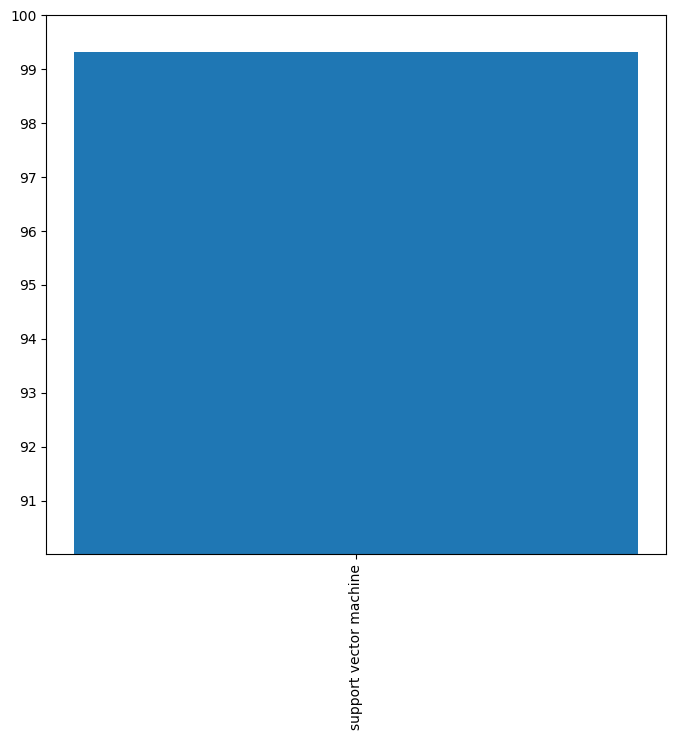

In [61]:
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.xticks(rotation="vertical")
plt.yticks((91,92,93,94,95,96,97,98,99,100))

#testing

In [62]:
#model testing with manual entry
def output_lable(n):
  if n == 0:
    return "Fake News"
  elif n == 1:
    return "Real News"
def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = logisticregression.predict(new_xv_test)
  pred_DT = decisiontree.predict(new_xv_test)
  pred_GB = gbc.predict(new_xv_test)
  pred_RF = randomforest.predict(new_xv_test)
  return print("\n\nLR Prediction : {} \nDT Prediction : {} \nGBC Prediction : {} \nRFC Prediction : {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),output_lable(pred_GB[0]),output_lable(pred_RF[0])))

In [ ]:
news = str(input())
manual_testing(news)

#deployment

In [64]:
# prompt: deployment code for the code

import pickle

# Save the trained models
with open('logistic_regression.pkl', 'wb') as f:
  pickle.dump(logisticregression, f)

with open('decision_tree.pkl', 'wb') as f:
  pickle.dump(decisiontree, f)

with open('gradient_boosting.pkl', 'wb') as f:
  pickle.dump(gbc, f)

with open('random_forest.pkl', 'wb') as f:
  pickle.dump(randomforest, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
  pickle.dump(vectorization, f)


In [65]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [66]:
# prompt: create a web app in streamlit

%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import re
import string
from nltk import tokenize

# Load the saved models and vectorizer
with open('logistic_regression.pkl', 'rb') as f:
    logistic_regression = pickle.load(f)

with open('decision_tree.pkl', 'rb') as f:
    decision_tree = pickle.load(f)

with open('gradient_boosting.pkl', 'rb') as f:
    gradient_boosting = pickle.load(f)

with open('random_forest.pkl', 'rb') as f:
    random_forest = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorization = pickle.load(f)

# Preprocessing function
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Function to predict news authenticity
def predict_news(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = logistic_regression.predict(new_xv_test)
    pred_DT = decision_tree.predict(new_xv_test)
    pred_GB = gradient_boosting.predict(new_xv_test)
    pred_RF = random_forest.predict(new_xv_test)
    return {
        "Logistic Regression": pred_LR[0],
        "Decision Tree": pred_DT[0],
        "Gradient Boosting": pred_GB[0],
        "Random Forest": pred_RF[0]
    }

# Streamlit app
st.title("Fake News Detection")
st.write("Enter the news text below to check its authenticity:")

news_text = st.text_area("News Text", "")

if st.button("Predict"):
    if news_text:
        predictions = predict_news(news_text)
        st.subheader("Predictions:")
        for model, prediction in predictions.items():
            result = "Fake News" if prediction == 0 else "Real News"
            st.write(f"{model}: {result}")
    else:
        st.warning("Please enter some news text.")


Writing app.py


In [67]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼

⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
⠧  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.40.209:8501

⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://spicy-maps-divide.loca.lt
  Stopping...
^C
